__Practice Objects__: Logistic Regression Assumption Diagnostics
0. Check the linear relationship between log odds and numeric features.
1. Transform numeric features into normal distributed.
2. Transform low cardinality features into one-hot encoding.
3. Transform high cardinality features using frequency encoding, leave-one-out encoding, and feature hashing.

__Conclusion__:
1. Log transform the features into normal distributed and drop sample data to avoid overfitting
2. The frequency encoding has slight higher score compared with feature hashing
3. The tunning parameter C is at 0.001 to reach the highest score, the roc_auc improved from 0.76 to 0.8


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
loans = pd.read_csv('./loans.w1.csv', index_col=None)

In [3]:
# transform zip back to string
loans.zip_code = loans.zip_code.astype(str)

In [4]:
np.sum(pd.isnull(loans), axis=0)

loan_amnt                             0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          5322
emp_length                         4789
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
desc                              94427
purpose                               0
title                                 0
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq            50382
mths_since_last_record            82847
open_acc                              0


### Check the linear relationship between log odds and numeric values

In [5]:
# take a random sample of numeric columns
np.random.seed(1234)
random_idex = np.random.choice(loans.index.values, 5000)
numeric_cols_sample = loans.iloc[random_idex][loans.dtypes[loans.dtypes != 'object'].index]
label_sample = loans.iloc[random_idex]['loan_status']
numeric_cols_sample.shape, label_sample.shape

((5000, 79), (5000,))

In [6]:
from scipy import stats

In [7]:
# calculate the bin probabilities
px_proba = {}
for col in numeric_cols_sample.columns:
    binner = stats.binned_statistic(numeric_cols_sample[col].fillna(0), numeric_cols_sample[col].fillna(0), 'count', bins=100)
    statistic, binnumber = binner.statistic, binner.binnumber
    bin_proba = {}
    for i in xrange(1, 100+1):
        denominator = statistic[i - 1] + 1
        numenator = sum(label_sample[binnumber == i] == 'Charged Off')
        bin_proba[i] = 1.0 * numenator / denominator
    px_proba[col] = bin_proba

plot log odds vs: mths_since_last_delinq 


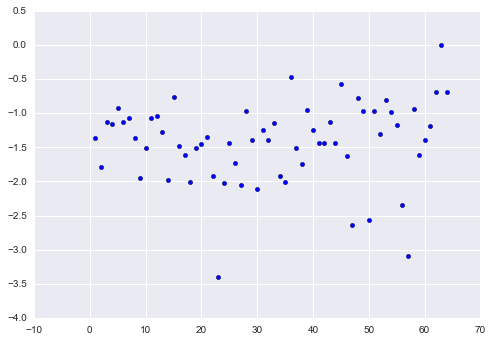

plot log odds vs: pub_rec_bankruptcies 


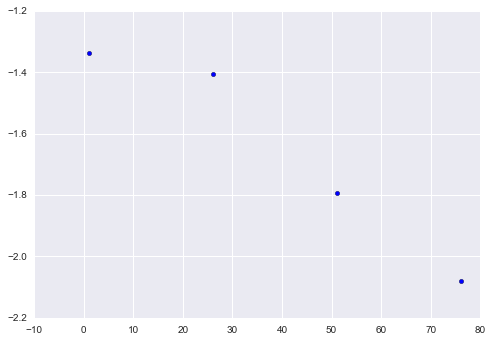

plot log odds vs: il_util 


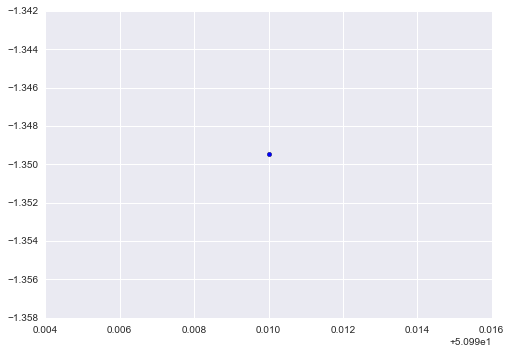

plot log odds vs: inq_last_6mths 


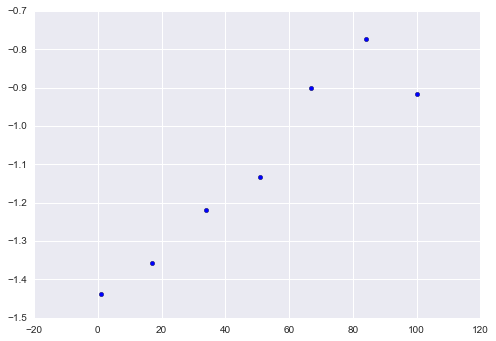

plot log odds vs: tot_cur_bal 


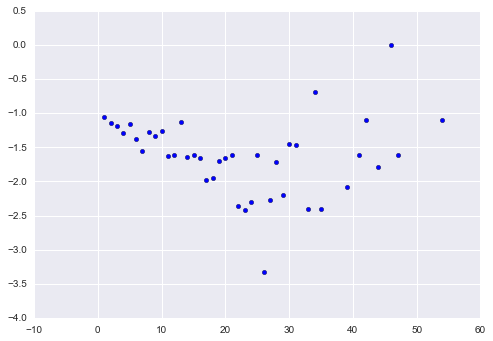

plot log odds vs: pct_tl_nvr_dlq 


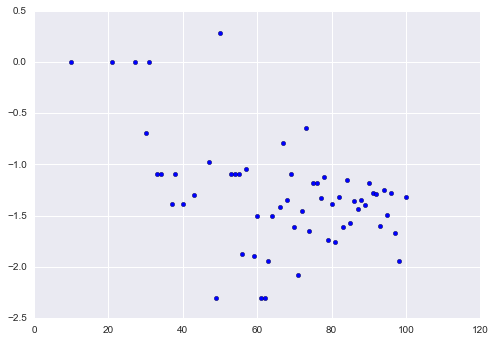

plot log odds vs: total_cu_tl 


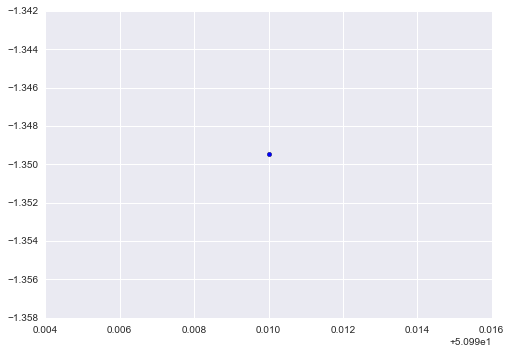

plot log odds vs: total_bal_ex_mort 


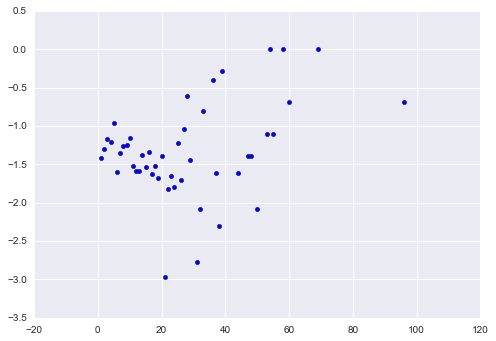

plot log odds vs: annual_inc 


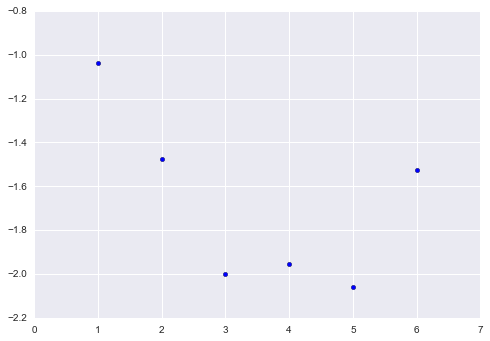

plot log odds vs: total_acc 


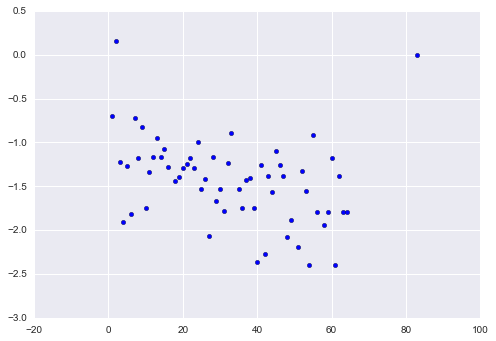

plot log odds vs: total_bal_il 


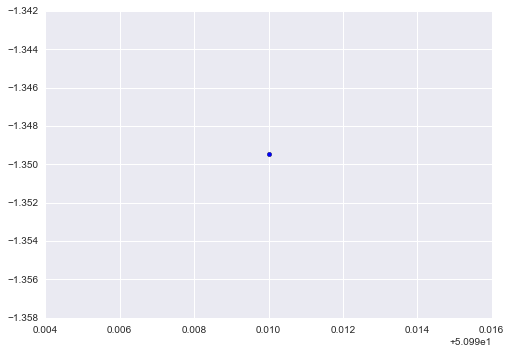

plot log odds vs: num_sats 


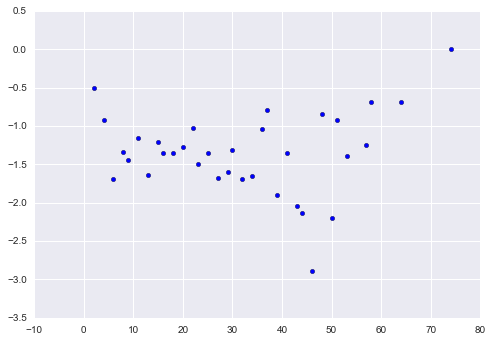

plot log odds vs: out_prncp 


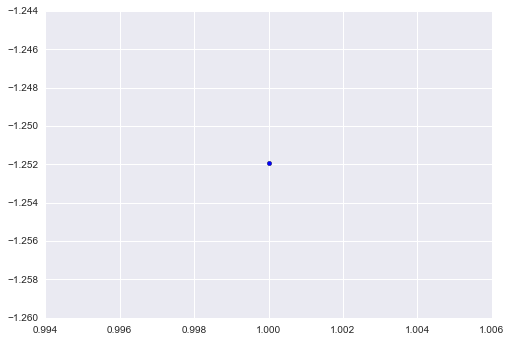

plot log odds vs: emp_length 


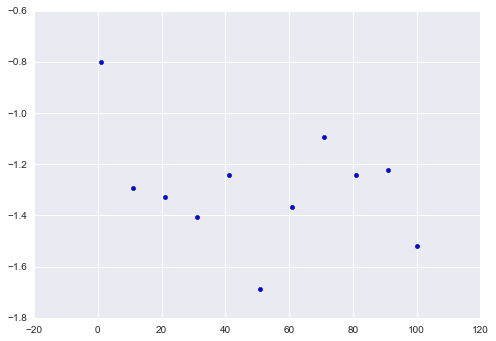

plot log odds vs: out_prncp_inv 


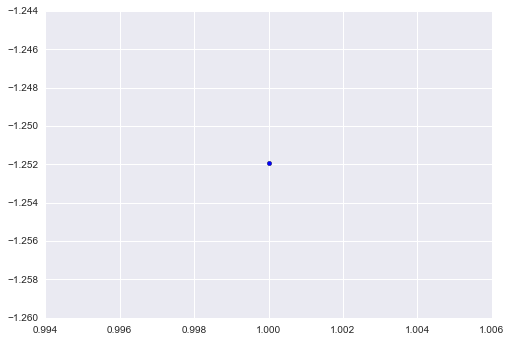

plot log odds vs: cr_len 


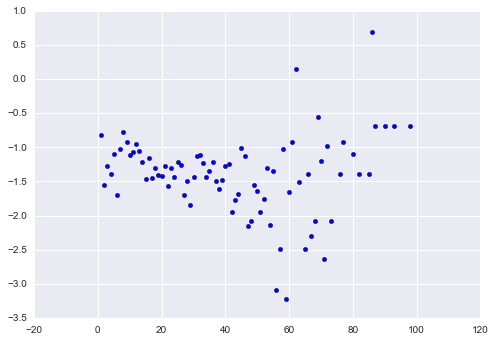

plot log odds vs: open_acc_6m 


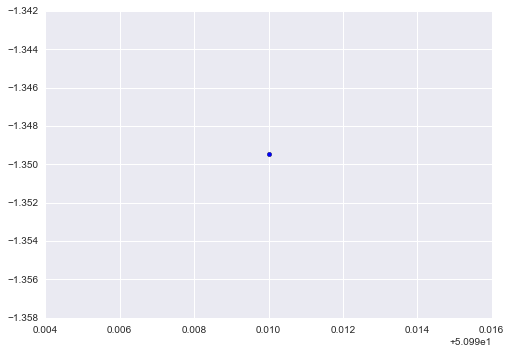

plot log odds vs: num_il_tl 


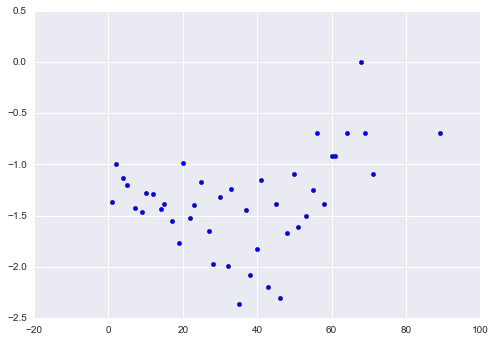

plot log odds vs: open_il_24m 


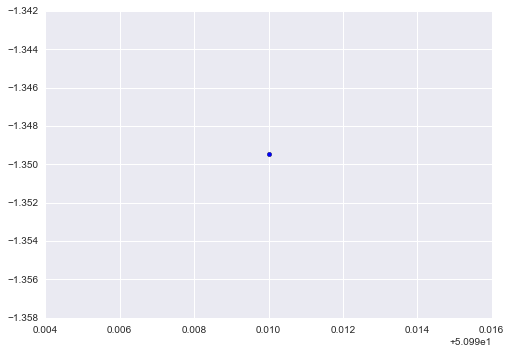

plot log odds vs: bc_util 


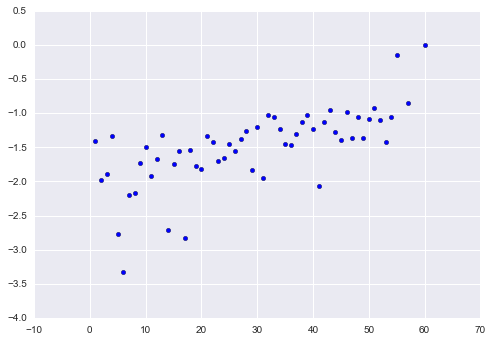

plot log odds vs: mo_sin_old_rev_tl_op 


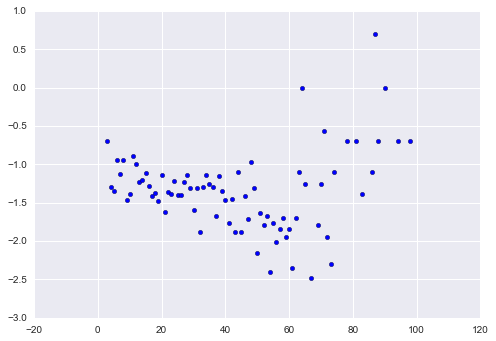

plot log odds vs: pub_rec 


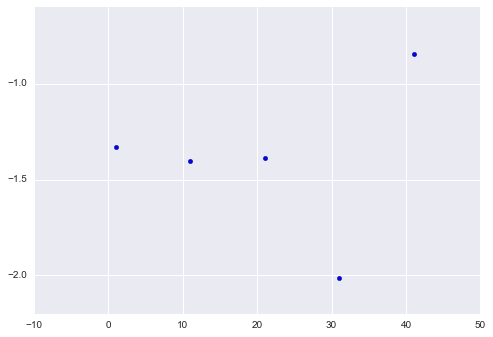

plot log odds vs: verification_status_joint 


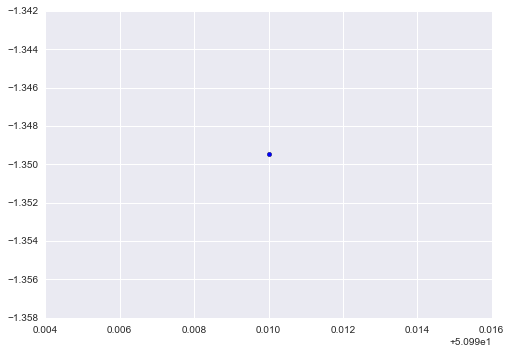

plot log odds vs: revol_util 


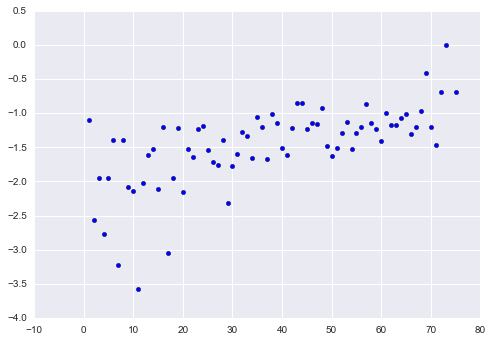

plot log odds vs: open_il_12m 


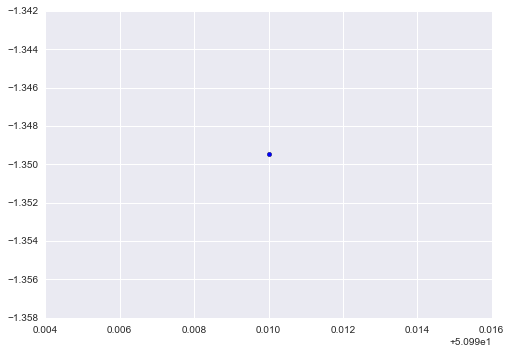

plot log odds vs: num_rev_tl_bal_gt_0 


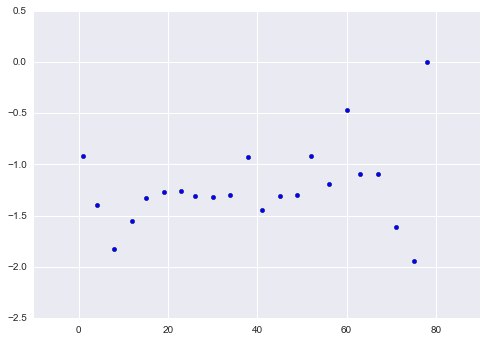

plot log odds vs: open_il_6m 


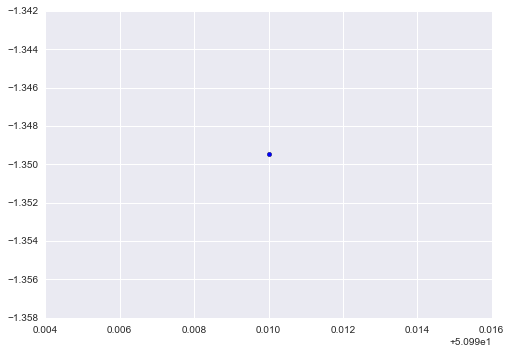

plot log odds vs: num_tl_30dpd 


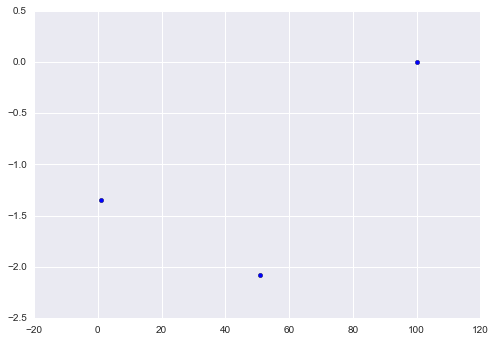

plot log odds vs: mths_since_recent_bc 


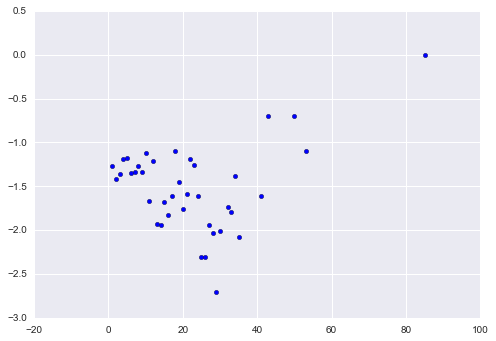

plot log odds vs: num_accts_ever_120_pd 


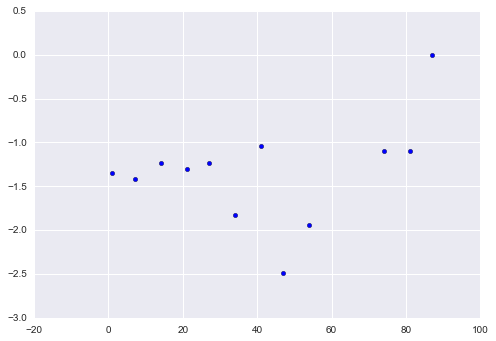

plot log odds vs: num_op_rev_tl 


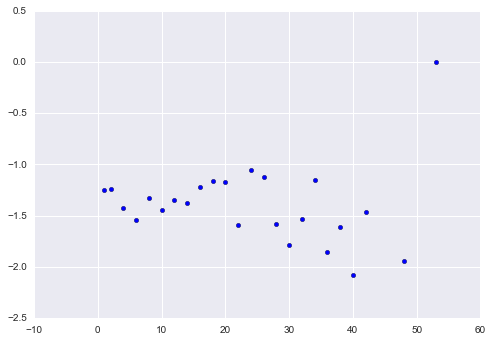

plot log odds vs: total_bc_limit 


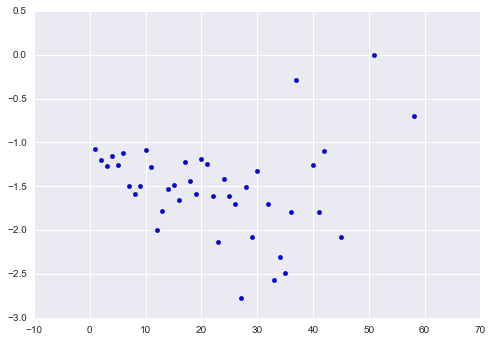

plot log odds vs: acc_open_past_24mths 


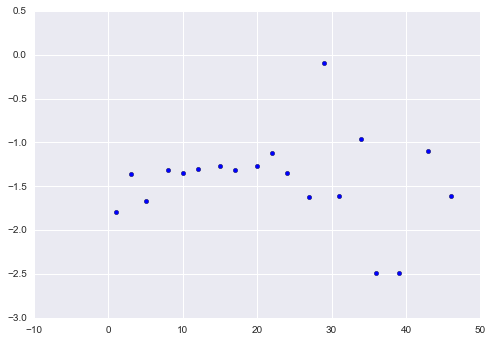

plot log odds vs: avg_cur_bal 


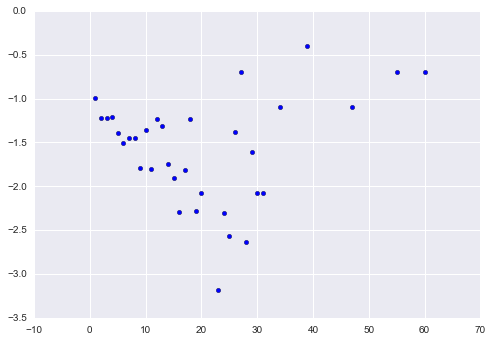

plot log odds vs: mo_sin_rcnt_rev_tl_op 


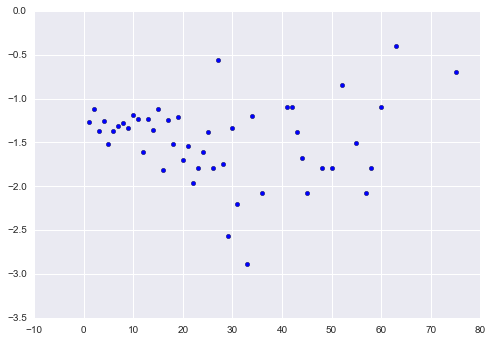

plot log odds vs: tax_liens 


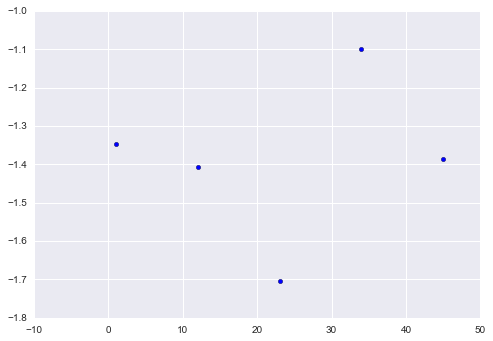

plot log odds vs: delinq_2yrs 


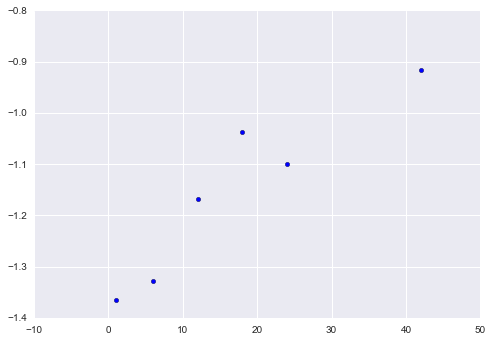

plot log odds vs: total_rev_hi_lim 


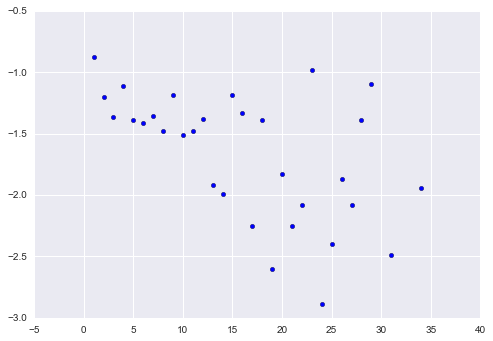

plot log odds vs: mths_since_recent_inq 


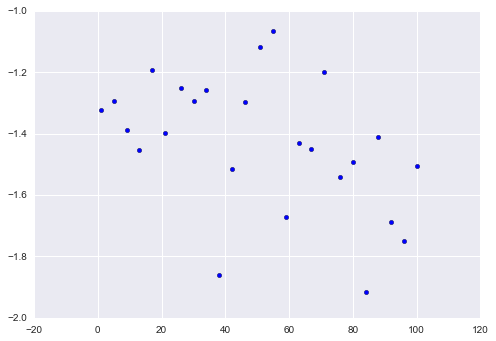

plot log odds vs: inq_fi 


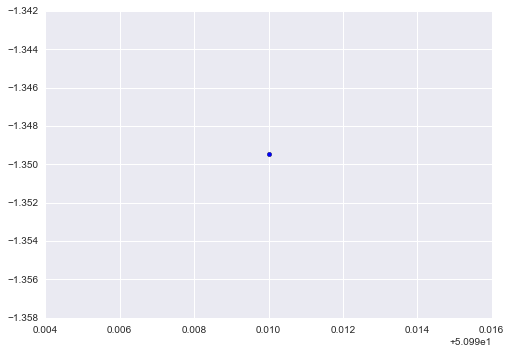

plot log odds vs: open_acc 


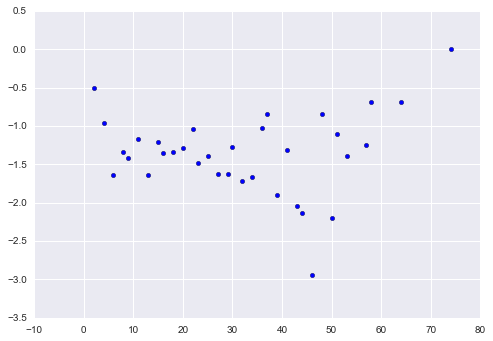

plot log odds vs: num_bc_sats 


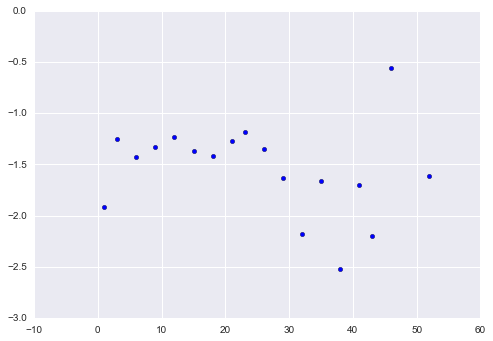

plot log odds vs: num_actv_bc_tl 


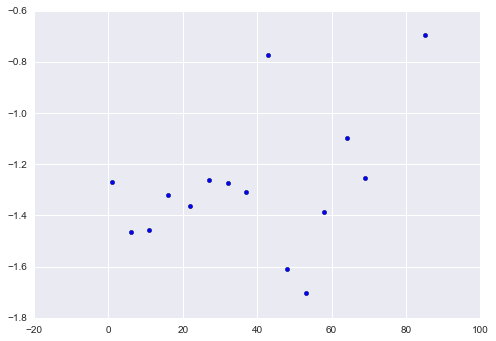

plot log odds vs: mort_acc 


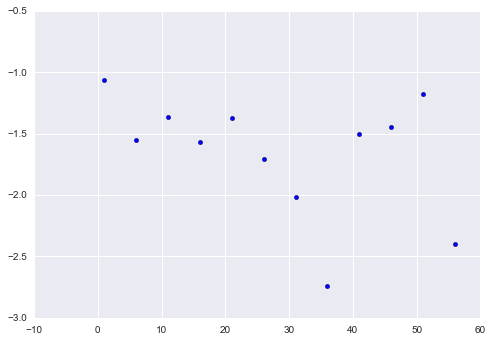

plot log odds vs: dti 


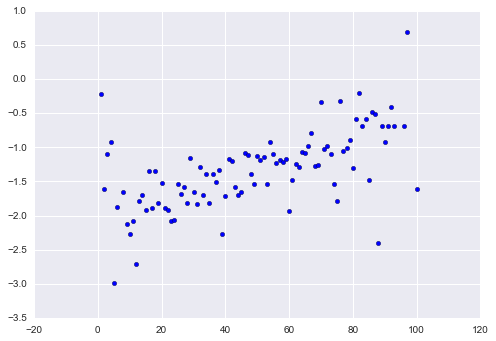

plot log odds vs: tot_coll_amt 


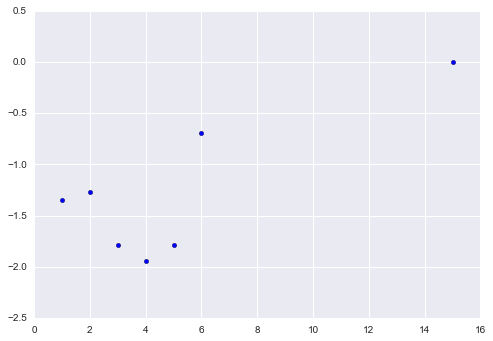

plot log odds vs: num_tl_120dpd_2m 


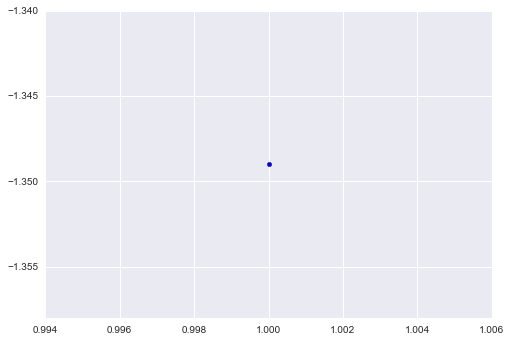

plot log odds vs: bc_open_to_buy 


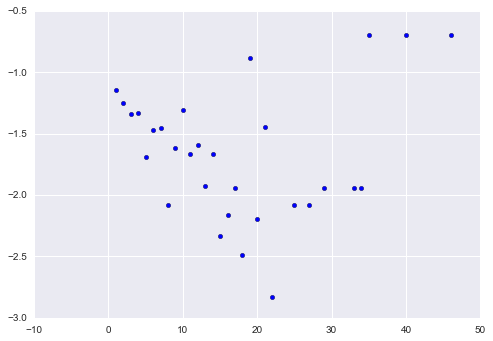

plot log odds vs: num_bc_tl 


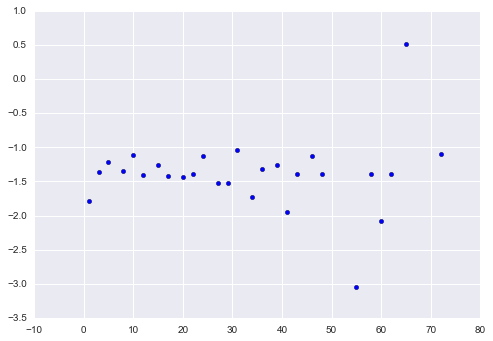

plot log odds vs: num_rev_accts 


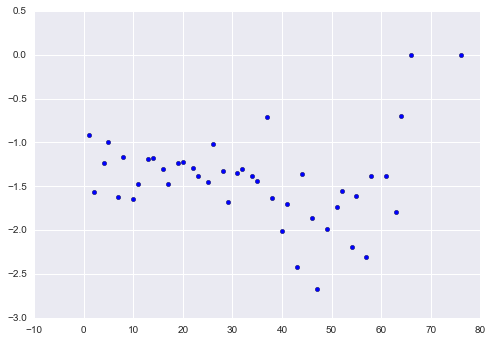

plot log odds vs: open_rv_12m 


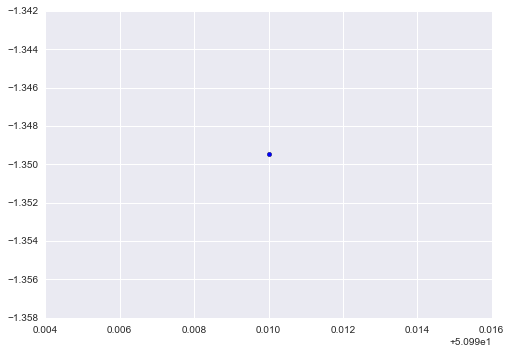

plot log odds vs: acc_now_delinq 


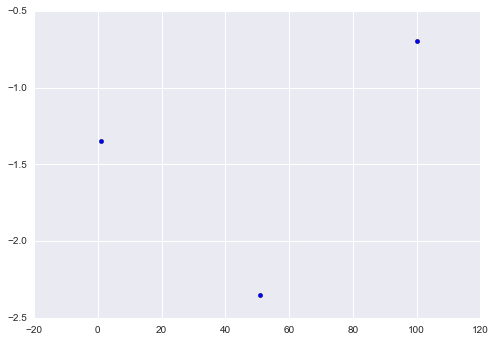

plot log odds vs: dti_joint 


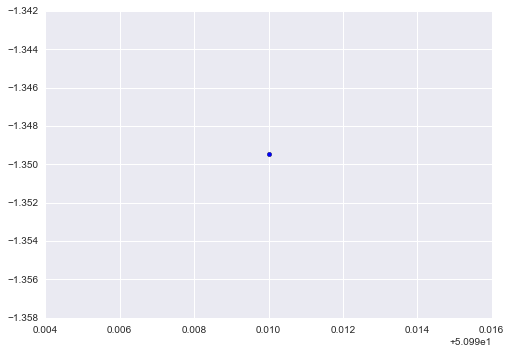

plot log odds vs: chargeoff_within_12_mths 


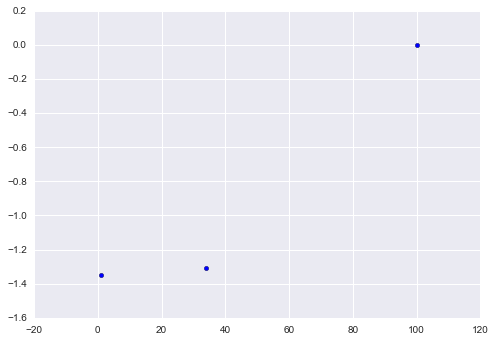

plot log odds vs: mths_since_recent_bc_dlq 


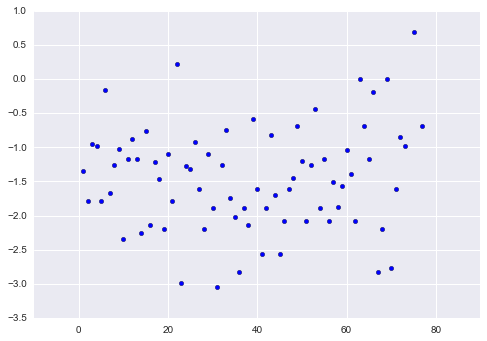

plot log odds vs: mths_since_last_record 


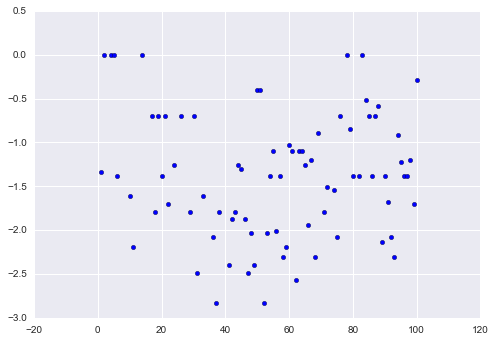

plot log odds vs: mths_since_last_major_derog 


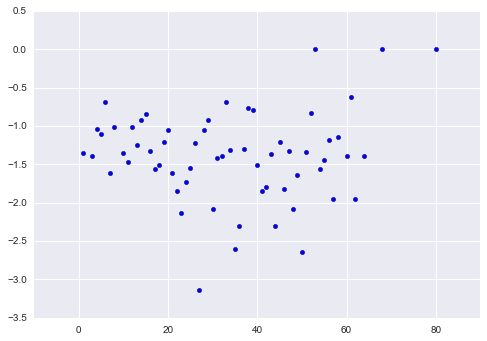

plot log odds vs: num_actv_rev_tl 


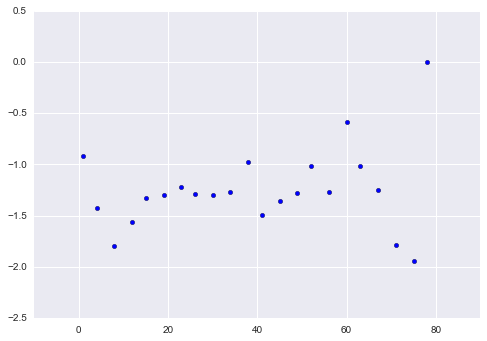

plot log odds vs: all_util 


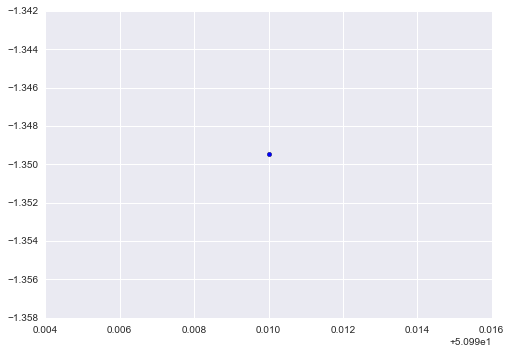

plot log odds vs: term 


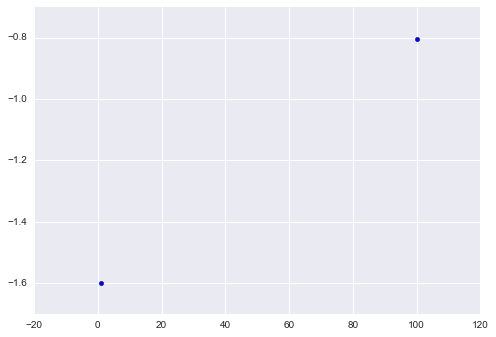

plot log odds vs: revol_bal 


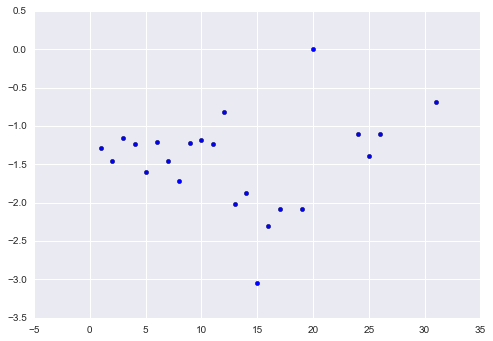

plot log odds vs: mths_since_recent_revol_delinq 


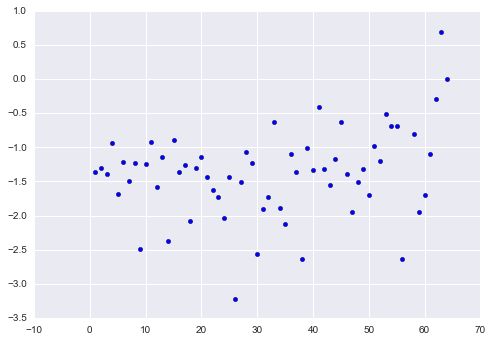

plot log odds vs: installment 


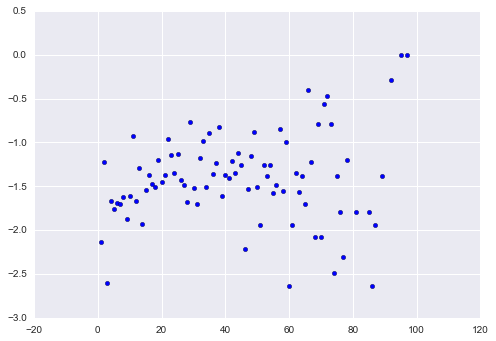

plot log odds vs: percent_bc_gt_75 


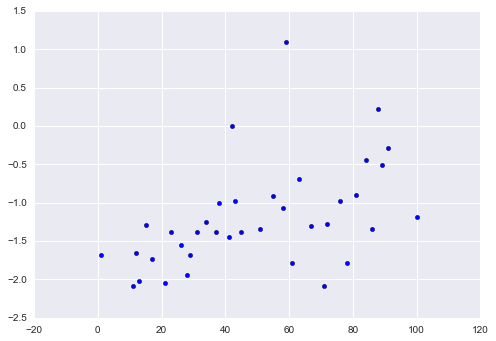

plot log odds vs: annual_inc_joint 


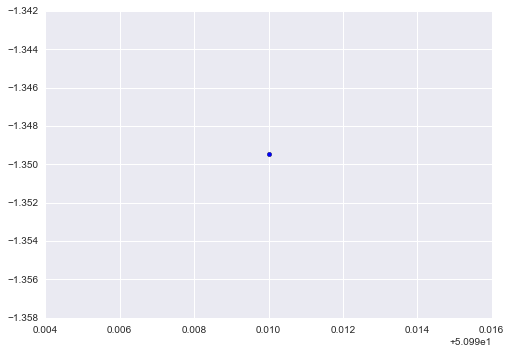

plot log odds vs: max_bal_bc 


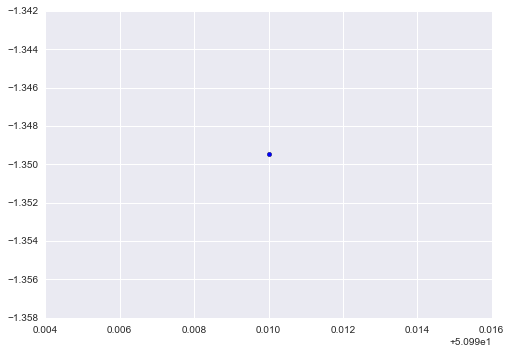

plot log odds vs: inq_last_12m 


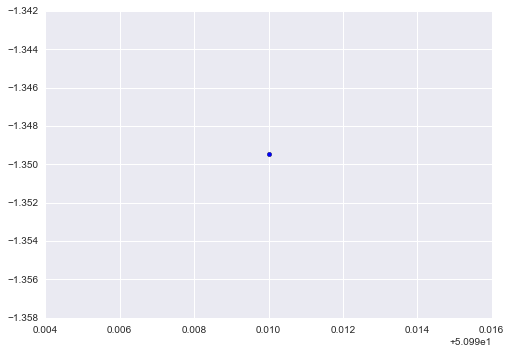

plot log odds vs: total_il_high_credit_limit 


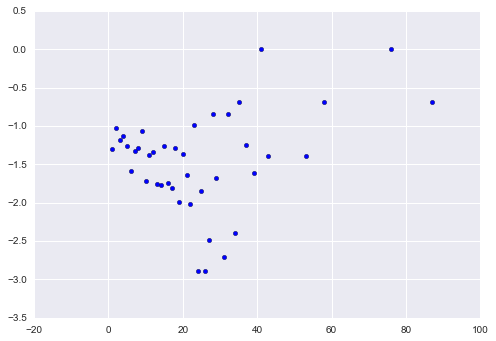

plot log odds vs: int_rate 


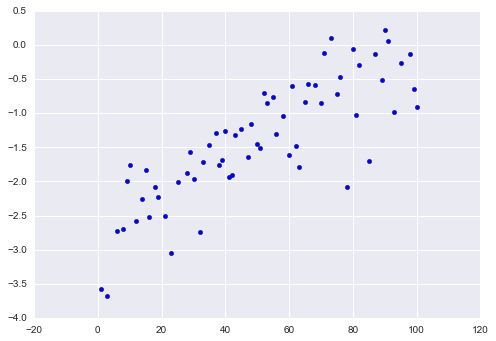

plot log odds vs: num_tl_90g_dpd_24m 


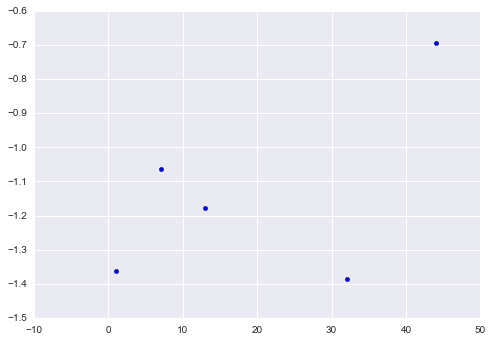

plot log odds vs: mths_since_rcnt_il 


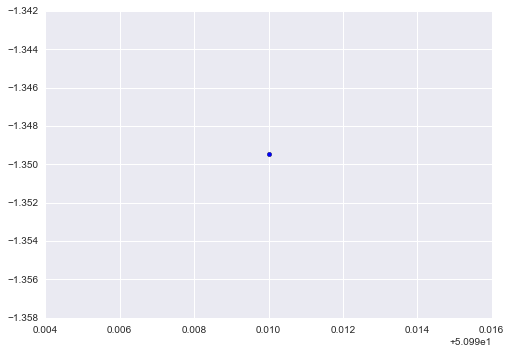

plot log odds vs: mo_sin_rcnt_tl 


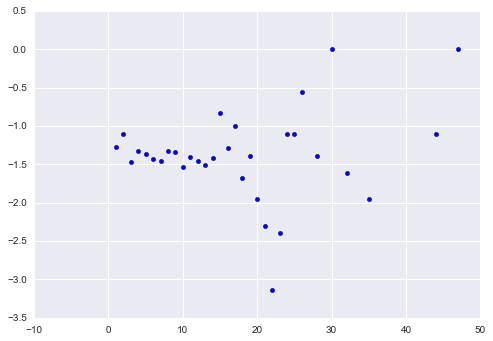

plot log odds vs: mo_sin_old_il_acct 


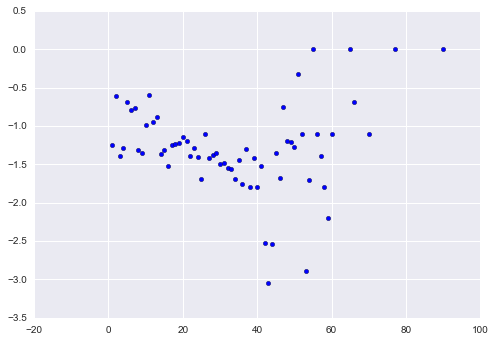

plot log odds vs: tot_hi_cred_lim 


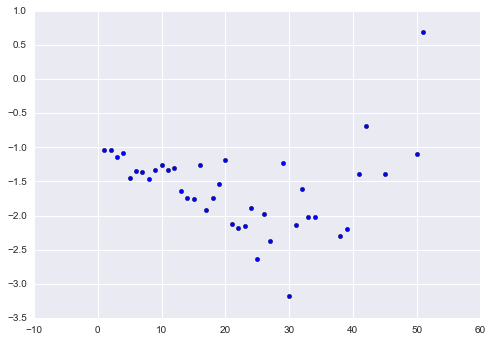

plot log odds vs: open_rv_24m 


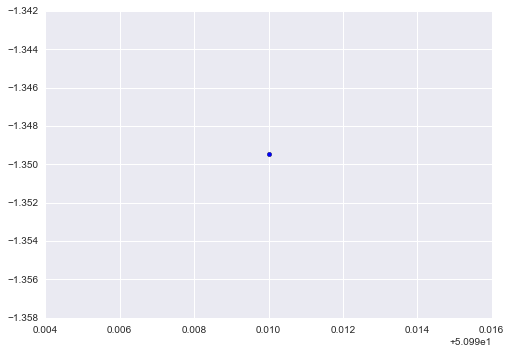

plot log odds vs: num_tl_op_past_12m 


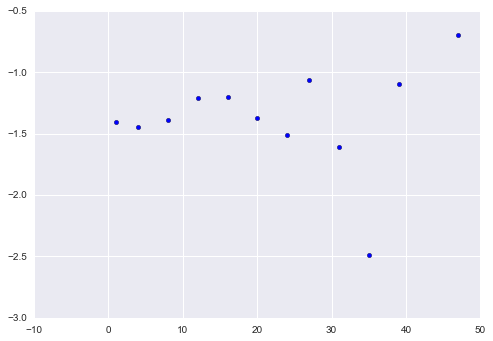

plot log odds vs: loan_amnt 


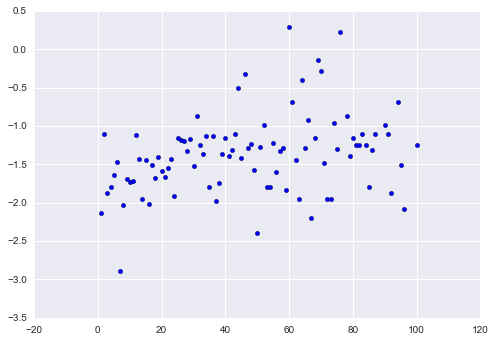

plot log odds vs: delinq_amnt 


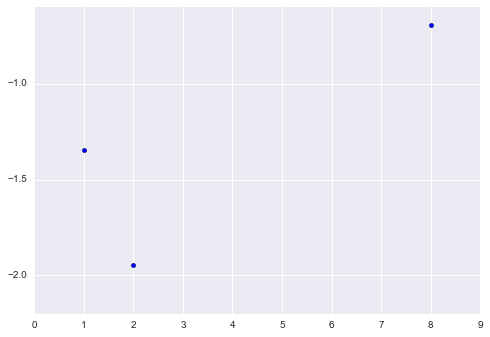

plot log odds vs: collections_12_mths_ex_med 


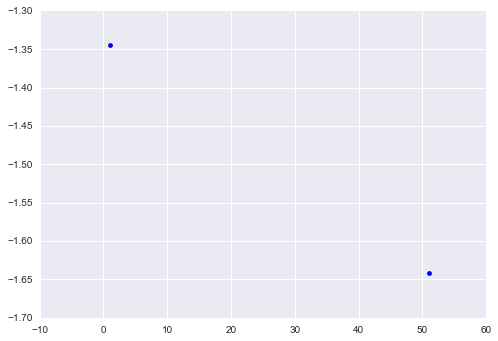

In [8]:
for col, val in px_proba.iteritems():
    print 'plot log odds vs: {} '.format(col)
    x = val.keys()
    y = val.values()
    log_odds = np.log(y / np.subtract(1, y))
    plt.scatter(x, log_odds)
    plt.show()

In [9]:
loans = loans.iloc[loans.index.drop(random_idex)]

### Those variables with high variance seem to have linear relationship with the label.

### Split Train and Test Set, Transform Label into Binary
- issue_d is used to split dataset
- loan_status is split into binary label with either 'fully paid' or 'non fully paid'

In [10]:
issue_d = loans['issue_d']
# the first 10 months as the training data, the last 2 months as test data
train_index = issue_d.index[pd.to_datetime(issue_d).dt.month <= 10]
print 'train_index: {}'.format(len(train_index))
test_index = issue_d.index[pd.to_datetime(issue_d).dt.month > 10]
print 'test_index: {}'.format(len(test_index))

train_index: 86386
test_index: 11170


In [11]:
loan_status = loans['loan_status']
loan_status.value_counts()

Fully Paid            70385
Charged Off           20253
Late (31-120 days)     3743
In Grace Period        2398
Late (16-30 days)       777
Name: loan_status, dtype: int64

In [12]:
loan_status[loan_status != 'Fully Paid'] = 0
loan_status[loan_status == 'Fully Paid'] = 1
loan_status.value_counts()

1    70385
0    27171
Name: loan_status, dtype: int64

## Numerica Features:
- Transform numerica features into normal distribution 

In [13]:
numeric_cols = loans[loans.dtypes[loans.dtypes != 'object'].index]

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

In [15]:
# function to transform numeric features into normal distribution
def trans_norm(feature):
    ecdf = ECDF(feature)
    # shrink the boundaries
    quantiles = ecdf(feature) * 0.98 + 0.01
    return norm.ppf(quantiles)

In [16]:
ecdf = ECDF(numeric_cols.emp_length)
ecdf(numeric_cols.emp_length)

array([ 0.95319611,  0.1441531 ,  0.95319611, ...,  0.95319611,
        0.95319611,  0.31274345])

In [17]:
numeric_cols = numeric_cols.apply(trans_norm)

In [18]:
numeric_cols.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,cr_len
count,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,9.755600e+04,9.755600e+04,9.755600e+04,97556.000000,97556.000000,97556.000000,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,9.755600e+04,97556.000000,9.755600e+04,9.755600e+04,9.755600e+04,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000,97556.000000
mean,0.046912,1.064311,0.041273,0.000911,0.375027,0.020400,0.000633,0.967381,0.542076,0.773580,1.626353,0.103454,1.039229,0.000225,0.002280,0.042310,1.432635,1.432635,1.990728,1.315439,2.326348e+00,2.326348e+00,2.326348e+00,2.167115,1.072291,0.000035,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,2.326348e+00,0.003292,2.326348e+00,2.326348e+00,2.326348e+00,0.175194,0.000122,0.006090,0.005308,2.067355,2.212125,0.018737,0.006165,0.086001,0.124814,0.355584,0.052193,1.402668,0.151512,1.141475,0.849566,0.250854,0.176816,0.201517,0.111169,0.093719,0.128488,0.067311,0.178251,0.103593,1.682253,2.218712,1.493178,0.313373,0.754102,0.291866,1.184684,1.753379,0.000114,0.000047,0.006814,0.052030,0.003000
std,0.966016,0.772538,0.923110,0.934737,1.081425,0.931814,0.934530,0.328920,0.638321,1.575551,1.448161,0.903358,0.391598,0.934226,0.934427,0.923596,0.108214,0.108213,0.036131,1.579417,8.881830e-16,8.881830e-16,8.881830e-16,0.010922,0.205986,0.934586,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,8.881830e-16,0.932610,8.881830e-16,8.881830e-16,8.881830e-16,0.887193,0.934504,0.929159,0.937160,0.022032,0.003818,0.953630,0.932680,0.868232,0.857554,0.680756,0.892670,1.552879,0.930428,1.608140,0.353033,0.866580,0.880669,0.872983,0.897134,0.883720,0.892624,0.910856,0.880176,0.903165,0.129156,0.005913,0.135680,0.848244,1.576948,1.031219,0.380727,0.068126,0.934439,0.934578,0.927486,0.849176,0.933691
min,-2.247928,0.591418,-2.322222,-2.325971,-1.031002,-2.325971,-2.309350,0.811429,-0.027677,-2.290905,-2.325595,-2.324843,0.850731,-2.229416,-2.222816,-2.324092,1.408749,1.408749,1.986460,-2.319245,2.326348e+00,2.326348e+00,2.3263

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1116ff6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114ba93d0>]], dtype=object)

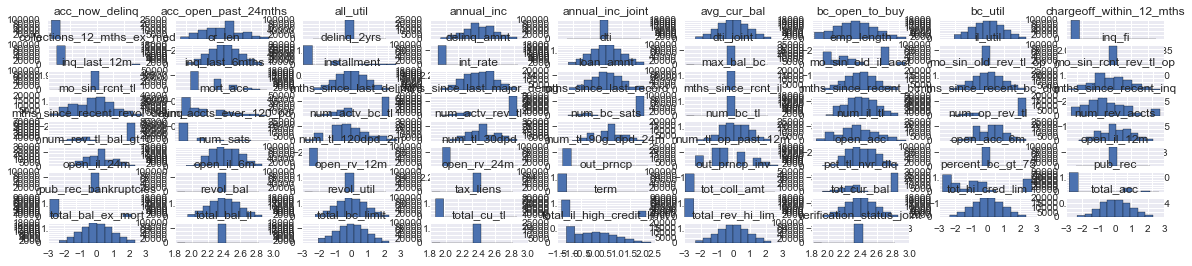

In [19]:
numeric_cols.hist(figsize=(20,4))

## Categorical Features:
- __Low Cardinality Feature:__ 
    - One-Hot Encoding
- __High Cardinality Feature Encoding:__
    - Frequency Encoding
    - Leave One Out Encoding
    - Feature Hashing

In [20]:
object_cols = loans[loans.dtypes[loans.dtypes == 'object'].index]
object_cols.describe()

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status
count,97556,97556,92484,97556,97556,97556,97556,97556,7668,97556,97556,97556,97556,97556
unique,7,35,37234,4,3,12,2,2,7518,13,1225,845,47,2
top,C,C2,Manager,MORTGAGE,Source Verified,2014-10-01 00:00:00,1,n,Borrower added on 03/10/14 > Debt consolidat...,debt_consolidation,Debt consolidation,945,CA,w
freq,27475,5725,1630,49214,39561,13811,70385,97554,7,60967,59661,1135,15113,49500


### One-Hot Encoding Low Cardinality Feature

In [21]:
# exclude emp_tile, title, zip_code, desc with high cardinality, the label of loan_status, the time series of issue_d
low_cardinality_cols = object_cols[object_cols.columns - ['emp_title', 'title', 'zip_code', 'desc', 'loan_status', 'issue_d']]

In [22]:
low_cardinality_cols.describe()

,addr_state,grade,home_ownership,initial_list_status,purpose,pymnt_plan,sub_grade,verification_status
count,97556,97556,97556,97556,97556,97556,97556,97556
unique,47,7,4,2,13,2,35,3
top,CA,C,MORTGAGE,w,debt_consolidation,n,C2,Source Verified
freq,15113,27475,49214,49500,60967,97554,5725,39561


In [23]:
# The final one-hot encoding should be equal to 113
low_cardinality_cols.describe().loc['unique'].sum()

113

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
# label encoding categorical columns
onehot_mapping = {}
for col in low_cardinality_cols.columns:
    print "Label encoding column: {}".format(col)
    LBL = LabelEncoder()
    LBL.fit(low_cardinality_cols[col])
    # create the encoded mapping
    onehot_mapping[col] = dict(zip(low_cardinality_cols[col].unique(), LBL.transform(low_cardinality_cols[col].unique())))
    low_cardinality_cols[col] = LBL.transform(low_cardinality_cols[col])
    print "'{}' is mapped as : {}".format(col, onehot_mapping[col])
    print "=================================================="

Label encoding column: addr_state
'addr_state' is mapped as : {'WA': 43, 'DE': 8, 'DC': 7, 'WI': 44, 'WV': 45, 'HI': 11, 'FL': 9, 'WY': 46, 'NH': 26, 'NJ': 27, 'NM': 28, 'TX': 39, 'LA': 16, 'NC': 25, 'TN': 38, 'NY': 30, 'PA': 34, 'AK': 0, 'NV': 29, 'VA': 41, 'CO': 5, 'CA': 4, 'AL': 1, 'AR': 2, 'VT': 42, 'IL': 12, 'GA': 10, 'IN': 13, 'OK': 32, 'AZ': 3, 'CT': 6, 'ME': 19, 'MD': 18, 'MA': 17, 'OH': 31, 'UT': 40, 'MO': 22, 'MN': 21, 'MI': 20, 'RI': 35, 'KS': 14, 'MT': 24, 'MS': 23, 'SC': 36, 'KY': 15, 'OR': 33, 'SD': 37}
Label encoding column: grade
'grade' is mapped as : {'A': 0, 'C': 2, 'B': 1, 'E': 4, 'D': 3, 'G': 6, 'F': 5}
Label encoding column: home_ownership
'home_ownership' is mapped as : {'OWN': 2, 'RENT': 3, 'MORTGAGE': 1, 'ANY': 0}
Label encoding column: initial_list_status
'initial_list_status' is mapped as : {'w': 1, 'f': 0}
Label encoding column: purpose
'purpose' is mapped as : {'debt_consolidation': 2, 'renewable_energy': 9, 'house': 4, 'medical': 6, 'wedding': 12, 'vacatio

In [26]:
# One hot encoding
enc = OneHotEncoder()
enc.fit(low_cardinality_cols)
low_cardinality_cols = enc.transform(low_cardinality_cols)
print 'one-hot encoding is done!'

one-hot encoding is done!


In [27]:
low_cardinality_cols.shape

(97556, 113)

In [28]:
low_cardinality_cols = pd.DataFrame(low_cardinality_cols.todense())

### High Cardinality Feature Encoding

- Frequency Encoding
- Leave One Out Encoding
- Feature Hashing


In [29]:
# emp_tile, title, zip_code, desc have high cardinality
high_cardinality_cols = object_cols[['emp_title', 'title', 'zip_code', 'desc']]

In [30]:
high_cardinality_cols.head()

,emp_title,title,zip_code,desc
0,MANAGEMENT,Debt consolidation,235,NaN
1,Technical Specialist,Debt consolidation,850,NaN
2,Admin Specialist,Debt consolidation,77,NaN
4,Deputy sheriff,Debt consolidation,144,NaN
5,Store Manager,Debt consolidation,208,NaN


- __Feature Hashing__

In [31]:
hasing_high_cardinality_cols = object_cols[['emp_title', 'title', 'zip_code', 'desc']]
hasing_high_cardinality_cols = hasing_high_cardinality_cols.fillna('')
hasing_high_cardinality_cols.describe()

,emp_title,title,zip_code,desc
count,97556,97556,97556,97556
unique,37235,1225,845,7519
top,,Debt consolidation,945,
freq,5072,59661,1135,89888


In [32]:
from sklearn.feature_extraction import FeatureHasher
from collections import Counter

In [33]:
# function to transform a sentence to word count dict
def trans_wordcount(sentence):
    return dict(Counter(sentence.split()).items())

In [34]:
for col in hasing_high_cardinality_cols.columns:
    print 'transform {} into word count dict.'.format(col)
    hasing_high_cardinality_cols[col] = hasing_high_cardinality_cols[col].apply(trans_wordcount)
    print '================================================='

transform emp_title into word count dict.
transform title into word count dict.
transform zip_code into word count dict.
transform desc into word count dict.


In [35]:
hasing_high_cardinality_cols

,emp_title,title,zip_code,desc
0,{u'MANAGEMENT': 1},"{u'Debt': 1, u'consolidation': 1}",{u'235': 1},{}
1,"{u'Technical': 1, u'Specialist': 1}","{u'Debt': 1, u'consolidation': 1}",{u'850': 1},{}
2,"{u'Admin': 1, u'Specialist': 1}","{u'Debt': 1, u'consolidation': 1}",{u'77': 1},{}
4,"{u'sheriff': 1, u'Deputy': 1}","{u'Debt': 1, u'consolidation': 1}",{u'144': 1},{}
5,"{u'Manager': 1, u'Store': 1}","{u'Debt': 1, u'consolidation': 1}",{u'208': 1},{}
6,"{u'Manufacturing': 1, u'Engineer': 1}","{u'Home': 1, u'improvement': 1}",{u'554': 1},{}
7,{u'Teacher': 1},"{u'Credit': 1, u'refinancing': 1, u'card': 1}",{u'982': 1},{}
8,{u'Sales': 1},"{u'Home': 1, u'buying': 1}",{u'331': 1},{}
9,"{u'practice': 1, u'plan': 1, u'associate': 1}","{u'Credit': 1, u'refinancing': 1, u'card': 1}",{u'112': 1},{}
11,"{u'Manager': 1, u'Humana': 1, u'Cares': 1}","{u'Debt': 1, u'consolidation': 1}",{u'336': 1},{}


In [36]:
hasing2_high_cardinality_cols = pd.DataFrame()
for col in hasing_high_cardinality_cols:
    print 'hashing feature {}...'.format(col)
    hasher = FeatureHasher(n_features=10)
    new_feature = hasher.transform(hasing_high_cardinality_cols[col])
    # transform sparse matrix into data frame
    new_feature = pd.DataFrame(new_feature.todense())
    new_feature_columns = []
    # generate new feature column names
    for i in xrange(10):
        new_feature_columns.append('{}_{}'.format(col, i))
    new_feature.columns =  new_feature_columns
    hasing2_high_cardinality_cols = pd.concat([hasing2_high_cardinality_cols, new_feature], axis=1)
    print new_feature.head()
    print new_feature.shape
    print '================================'

hashing feature emp_title...
   emp_title_0  emp_title_1  emp_title_2  emp_title_3  emp_title_4  \
0         -1.0          0.0          0.0          0.0          0.0   
1          1.0          0.0         -1.0          0.0          0.0   
2          0.0          0.0         -1.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   emp_title_5  emp_title_6  emp_title_7  emp_title_8  emp_title_9  
0          0.0          0.0          0.0          0.0          0.0  
1          0.0          0.0          0.0          0.0          0.0  
2          1.0          0.0          0.0          0.0          0.0  
3          0.0          0.0          0.0          0.0          0.0  
4          0.0          0.0          0.0          0.0          0.0  
(97556, 10)
hashing feature title...
   title_0  title_1  title_2  title_3  title_4  title_5  title_6  title_7  \
0      0.0      0.0   

In [37]:
hasing2_high_cardinality_cols.shape

(97556, 40)

- __Frequency Encoding__
'desc' is reasonable for feature hashing, so we exclude 'desc' for frequency encoding and later leave-one-out encoding

In [38]:
freq_high_cardinality_cols = high_cardinality_cols[['emp_title', 'title', 'zip_code']]
freq_high_cardinality_cols = freq_high_cardinality_cols.fillna('')

In [39]:
freq_mapping = {}
for col in freq_high_cardinality_cols.columns:
    print 'generate value counts mapping: {}...'.format(col)
    freq_mapping[col] = dict(freq_high_cardinality_cols[col].value_counts())
    print '==========================='

generate value counts mapping: emp_title...
generate value counts mapping: title...
generate value counts mapping: zip_code...


In [40]:
# map feature value into frequency count
for col in freq_high_cardinality_cols.columns:
    print 'mapping feature: {}...'.format(col)
    freq_high_cardinality_cols[col] = freq_high_cardinality_cols[col].apply(lambda x : freq_mapping[col][x])
    print '==========================='

mapping feature: emp_title...
mapping feature: title...
mapping feature: zip_code...


In [41]:
freq_high_cardinality_cols.head()

,emp_title,title,zip_code
0,2,59661,59
1,11,59661,473
2,3,59661,218
4,10,59661,121
5,239,59661,267


- __Leave-One-Out Encoding__

In [42]:
loo_high_cardinality_cols = high_cardinality_cols[['emp_title', 'title', 'zip_code']]
loo_high_cardinality_cols = loo_high_cardinality_cols.fillna('')

In [43]:
train_loo_high_cardinality_cols = loo_high_cardinality_cols.loc[train_index]
test_loo_high_cardinality_cols = loo_high_cardinality_cols.loc[test_index]

In [44]:
label_sample.value_counts()

Fully Paid            3601
Charged Off           1030
Late (31-120 days)     203
In Grace Period        126
Late (16-30 days)       40
Name: loan_status, dtype: int64

In [47]:
def trans_loo_proba(feature_col, tag):
    for idx, val in pd.Series(feature_col).iteritems():
        # get all index with the same val
        all_idx = feature_col[feature_col == val].index
        if tag == 'train':
            # exclude the idx
            label_idx = all_idx.drop(idx)
            feature_col.loc[idx] = 1.0 * loan_status.value_counts().loc[1] / (len(label_idx) + 1) * np.random.normal(loc=1, scale=1.0, size=None)
        elif tag == 'test':
            feature_col.loc[idx] = 1.0 * loan_status.value_counts().loc[1] / (len(all_idx) + 1)
        else:
            return

In [48]:
for col in train_loo_high_cardinality_cols.columns:
    print 'leave-one-out encoding training feature: {} ...'.format(col)
    trans_loo_proba(train_loo_high_cardinality_cols[col], 'train')
    print '{col} is complete ==================================='

leave-one-out encoding training feature: emp_title ...
{col} is complete ===================================
leave-one-out encoding training feature: title ...
{col} is complete ===================================
leave-one-out encoding training feature: zip_code ...
{col} is complete ===================================


In [49]:
for col in test_loo_high_cardinality_cols.columns:
    print 'leave-one-out encoding validation feature: {} ...'.format(col)
    trans_loo_proba(test_loo_high_cardinality_cols[col], 'test')
    print '{col} is complete ==================================='

leave-one-out encoding validation feature: emp_title ...
{col} is complete ===================================
leave-one-out encoding validation feature: title ...
{col} is complete ===================================
leave-one-out encoding validation feature: zip_code ...
{col} is complete ===================================


## Construct the final datasets

- Frequency Encoding

In [43]:
# 62 + 113 + 3 + 10 = 188
desc_cols = hasing2_high_cardinality_cols[hasing2_high_cardinality_cols.columns[-10:]]
freq_loans = pd.concat([numeric_cols, low_cardinality_cols, freq_high_cardinality_cols], axis=1)
freq_loans.shape

(102215, 195)

In [44]:
# split the train and test sets
train_freq_loans = freq_loans.loc[train_index].fillna(0)
test_freq_loans = freq_loans.loc[test_index].fillna(0)
print train_freq_loans.shape, test_freq_loans.shape

(86386, 195) (11170, 195)


- Feature Hashing

In [52]:
# 62 + 113 + 40 = 215
hashing_loans = pd.concat([numeric_cols, low_cardinality_cols, hasing2_high_cardinality_cols], axis=1)
hashing_loans.shape

(102215, 232)

In [53]:
# split the train and test sets
train_hashing_loans = hashing_loans.loc[train_index].fillna(0)
test_hashing_loans = hashing_loans.loc[test_index].fillna(0)
print train_hashing_loans.shape, test_hashing_loans.shape

(86386, 232) (11170, 232)


- Leave-one-out encoding

In [67]:
# split the train and test sets
# 62 + 113 + 3 + 40 =218
desc_cols = hasing2_high_cardinality_cols
train_loo_loans = pd.concat([numeric_cols.loc[train_index], low_cardinality_cols.loc[train_index], train_loo_high_cardinality_cols, desc_cols.loc[train_index]], axis=1).fillna(0)
test_loo_loans = pd.concat([numeric_cols.loc[test_index], low_cardinality_cols.loc[test_index], test_loo_high_cardinality_cols, desc_cols.loc[test_index]], axis=1).fillna(0)                
print train_loo_loans.shape, test_loo_loans.shape

(86386, 235) (11170, 235)


- Label Split

In [45]:
train_y = loan_status.loc[train_index].tolist()
test_y = loan_status.loc[test_index].tolist()
print len(train_y), len(test_y)

86386 11170


## Logistic Regression

In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [58]:
train_freq_loans.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,cr_len,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,emp_title,title,zip_code
10703,0.562421,0.591418,-0.963476,0.656587,-0.711638,1.601236,-0.946749,0.811429,-0.027677,-0.436726,2.326348,0.847121,0.850731,0.041509,-0.450730,1.384773,1.408749,1.408749,1.98646,-1.066037,2.326348,2.326348,2.326348,2.166322,1.254835,0.985458,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,0.242268,2.326348,2.326348,2.326348,-0.318073,0.701747,0.633981,-0.437723,2.065183,2.211929,0.871158,0.523783,0.431441,0.417004,1.660030,-0.100108,-1.059173,0.257257,-0.763397,0.668567,0.149268,0.146646,0.521416,1.148638,1.317234,0.478952,0.620005,0.162267,0.856386,1.656346,2.21837,1.458565,0.300244,0.011357,-0.617718,1.028135,1.741368,0.959399,1.140639,0.443106,0.700137,0.390967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,285.0,59661.0,623.0
10750,-0.578480,0.591418,-0.184711,-0.507905,-0.182483,-0.669197,0.680263,0.811429,0.748120,2.326348,2.326348,-0.521964,0.850731,-0.663726,1.208703,-1.481638,1.408749,1.408749,1.98646,2.326348,2.326348,2.326348,2.326348,2.166322,1.004918,0.119513,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,2.326348,-1.339936,2.326348,2.326348,2.326348,0.692244,0.349837,-0.926523,0.701200,2.065183,2.211929,-1.610745,-1.462883,-0.099146,0.247042,0.113302,0.515195,2.326348,0.130171,2.326348,0.668567,0.149268,-0.222813,-0.271416,-1.184489,-0.473819,-0.561124,-1.485878,-0.208329,-0.507705,1.656346,2.21837,1.458565,0.851961,2.326348,-0.252107,1.028135,1.741368,0.106158,-0.457709,-0.835891,-0.379793,-0.232400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,59661.0,46.0
10771,1.166500,0.591418,-1.893484,1.156662,-0.477541

In [59]:
lgr = LogisticRegression(penalty='l2', random_state=101)
lgr = lgr.fit(train_freq_loans, train_y)
preds = lgr.predict(test_freq_loans)
score = roc_auc_score(test_y, preds)
print score

0.520838714276


In [60]:
def C_search(train_X, train_y, test_X, test_y, C = [0.01, 0.1, 1, 10, 100, 1000]):
    for c in C:
        logregressor = LogisticRegression(penalty='l2', C=c)
        logregressor.fit(train_X, train_y)
        pred = logregressor.predict(test_X)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred, pos_label=1)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print c, roc_auc
#         print "C {} :     score: {}".format(c, roc_auc)

In [61]:
def alpha_search(train_X, train_y, test_X, test_y, alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]):
    for a in alpha:
        elasticNet = ElasticNet(alpha=a)
        elasticNet.fit(train_X, train_y)
        pred = elasticNet.predict(test_X)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        print "alpha {} :     score: {}".format(a, roc_auc)

- Frequency Encoding Dataset

In [62]:
alpha_search(train_freq_loans, train_y, test_freq_loans, test_y)

alpha 1e-05 :     score: 0.802298073314
alpha 0.0001 :     score: 0.802871812415
alpha 0.001 :     score: 0.803280811536
alpha 0.1 :     score: 0.681870923907
alpha 1 :     score: 0.536671104459
alpha 10 :     score: 0.533511282161
alpha 100 :     score: 0.515696044473
alpha 1000 :     score: 0.5
alpha 10000 :     score: 0.5


- Feature Hashing Dataset

In [63]:
alpha_search(train_hashing_loans, train_y, test_hashing_loans, test_y)

alpha 1e-05 :     score: 0.800806328843
alpha 0.0001 :     score: 0.801459321027
alpha 0.001 :     score: 0.801820540232
alpha 0.1 :     score: 0.684050497707
alpha 1 :     score: 0.5
alpha 10 :     score: 0.5
alpha 100 :     score: 0.5
alpha 1000 :     score: 0.5
alpha 10000 :     score: 0.5


- Leave-one-out Encoding Dataset

In [68]:
alpha_search(train_loo_loans, train_y, test_loo_loans, test_y)

alpha 1e-05 :     score: 0.800825277362
alpha 0.0001 :     score: 0.801452612073
alpha 0.001 :     score: 0.8018355356
alpha 0.1 :     score: 0.681731138194
alpha 1 :     score: 0.493783156344
alpha 10 :     score: 0.497079172309
alpha 100 :     score: 0.50921181194
alpha 1000 :     score: 0.5
alpha 10000 :     score: 0.5


### We choose frequency encoding dataset with C of 0.001 as the final model for linear diagonstics

In [69]:
elasticNet = ElasticNet(alpha=0.001)
elasticNet.fit(train_freq_loans, train_y)
preds = elasticNet.predict(test_freq_loans)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, preds)
roc_auc = auc(false_positive_rate, true_positive_rate)

### Plot the roc curve

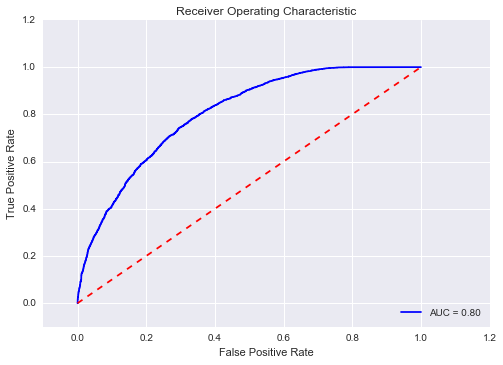

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### write out freq dataset

In [47]:
pd.concat([train_freq_loans, loan_status.loc[train_index]], axis=1).to_csv('./train_freq_loans.csv', index=False)

In [48]:
pd.concat([test_freq_loans, loan_status.loc[test_index]], axis=1).to_csv('./test_freq_loans.csv', index=False)